# Data Visualization with Seaborn

This notebook contains data visualization examples using Seaborn.


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import io
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
data = pd.read_csv('/Users/jiufeng/Documents/Documents_iCloud/project/company-atlas/company-atlas/data/raw/fortune1000/fortune1000_2024.csv')
data.head()

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,...,Assets_M,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,...,252399.0,C. Douglas McMillon,U.S.,Bentonville,Arkansas,https://www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",559911.0,2024-08-05
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,yes,no,no,no,0.0,...,527854.0,Andrew R. Jassy,U.S.,Seattle,Washington,https://www.amazon.com,Public,"Market value as of July 15, 2024.",2005565.0,2024-08-05
2,3,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,no,1.0,...,352583.0,Timothy D. Cook,U.S.,Cupertino,California,https://www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3594309.0,2024-08-05
3,4,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,1.0,...,273720.0,Andrew P. Witty,U.S.,Minnetonka,Minnesota,https://www.unitedhealthgroup.com,Public,"Market value as of July 15, 2024.",474339.0,2024-08-05
4,5,Berkshire Hathaway,BRKA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,2.0,...,1069978.0,Warren E. Buffett,U.S.,Omaha,Nebraska,https://www.berkshirehathaway.com,Public,"Market value as of July 15, 2024.",937028.0,2024-08-05


In [5]:
data.shape

(1000, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Ticker                         959 non-null    object 
 3   Sector                         1000 non-null   object 
 4   Industry                       1000 non-null   object 
 5   Profitable                     1000 non-null   object 
 6   Founder_is_CEO                 1000 non-null   object 
 7   FemaleCEO                      1000 non-null   object 
 8   Growth_in_Jobs                 1000 non-null   object 
 9   Change_in_Rank                 1000 non-null   float64
 10  Gained_in_Rank                 1000 non-null   object 
 11  Dropped_in_Rank                1000 non-null   object 
 12  Newcomer_to_the_Fortune500     500 non-null    ob

In [7]:
data.isnull().sum()

Rank                               0
Company                            0
Ticker                            41
Sector                             0
Industry                           0
Profitable                         0
Founder_is_CEO                     0
FemaleCEO                          0
Growth_in_Jobs                     0
Change_in_Rank                     0
Gained_in_Rank                     0
Dropped_in_Rank                    0
Newcomer_to_the_Fortune500       500
Global500                          0
Worlds_Most_Admired_Companies      0
Best_Companies_to_Work_For         0
Number_of_employees                0
MarketCap_March28_M               41
Revenues_M                         0
RevenuePercentChange               6
Profits_M                          2
ProfitsPercentChange             150
Assets_M                           0
CEO                                0
Country                            0
HeadquartersCity                   0
HeadquartersState                  0
W

In [8]:
data = data.drop("Newcomer_to_the_Fortune500", axis=1)

In [9]:
data

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,...,Assets_M,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,...,252399.0,C. Douglas McMillon,U.S.,Bentonville,Arkansas,https://www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",559911.0,2024-08-05
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,yes,no,no,no,0.0,...,527854.0,Andrew R. Jassy,U.S.,Seattle,Washington,https://www.amazon.com,Public,"Market value as of July 15, 2024.",2005565.0,2024-08-05
2,3,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,no,1.0,...,352583.0,Timothy D. Cook,U.S.,Cupertino,California,https://www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3594309.0,2024-08-05
3,4,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,1.0,...,273720.0,Andrew P. Witty,U.S.,Minnetonka,Minnesota,https://www.unitedhealthgroup.com,Public,"Market value as of July 15, 2024.",474339.0,2024-08-05
4,5,Berkshire Hathaway,BRKA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,2.0,...,1069978.0,Warren E. Buffett,U.S.,Omaha,Nebraska,https://www.berkshirehathaway.com,Public,"Market value as of July 15, 2024.",937028.0,2024-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Allegiant Travel,ALGT,Transportation,Airlines,yes,no,no,yes,0.0,...,4869.4,Maurice J. Gallagher Jr.,U.S.,Las Vegas,Nevada,https://www.allegiant.com,Public,"Market value as of March 28, 2024.",1375.0,2024-06-04
996,997,Dropbox,DBX,Technology,Computer Software,yes,yes,no,no,0.0,...,2983.5,Andrew W. Houston,U.S.,San Francisco,California,https://www.dropbox.com,Public,"Market value as of March 28, 2024.",8359.0,2024-06-04
997,998,Exact Sciences,EXAS,Health Care,Pharmaceuticals,no,no,no,yes,0.0,...,6471.3,Kevin T. Conroy,U.S.,Madison,Wisconsin,https://www.exactsciences.com,Public,"Market value as of March 28, 2024.",12537.0,2024-06-04
998,999,BWX Technologies,BWXT,Aerospace & Defense,Aerospace & Defense,yes,no,no,yes,0.0,...,2747.1,Rex D. Geveden,U.S.,Lynchburg,Virginia,https://www.bwxt.com,Public,"Market value as of March 28, 2024.",9380.0,2024-06-04


In [16]:
data = data.fillna({
    'Ticker': 'Unknown',
    'MarketCap_March28_M' : 0,
    'ProfitsPercentChange': 0,
    'RevenuePercentChange': 0,
    'Profits_M': 0,
    'MarketCap_Updated_M': 0
    
})

In [17]:
any(data.isna().sum())

False

## Data Analysis Overview

This section performs comprehensive data analysis including:
- Outlier detection and analysis
- Data distribution analysis
- Correlation analysis with heatmap
- Various seaborn visualizations


In [18]:
# Statistical summary of numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)
print("\n" + "="*80)
data[numerical_cols].describe()


Numerical columns: ['Rank', 'Change_in_Rank', 'Number_of_employees', 'MarketCap_March28_M', 'Revenues_M', 'RevenuePercentChange', 'Profits_M', 'ProfitsPercentChange', 'Assets_M', 'MarketCap_Updated_M']



,Rank,Change_in_Rank,Number_of_employees,MarketCap_March28_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M
count,1000.000000,1000.00000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,500.498000,5.83800,3.661176e+04,4.875450e+04,20965.064200,6.747400,1863.431500,2.84640,6.375722e+04,5.197739e+04
std,288.819686,66.88084,9.990100e+04,1.876610e+05,48589.311028,34.817451,6643.752104,865.27963,2.721551e+05,2.252115e+05
min,1.000000,-577.00000,2.800000e+01,0.000000e+00,2489.000000,-78.300000,-10298.000000,-22340.00000,3.613000e+02,0.000000e+00
25%,250.750000,-14.00000,6.718000e+03,4.044850e+03,3968.375000,-4.700000,154.500000,-30.15000,5.342950e+03,4.120750e+03
50%,500.500000,4.00000,1.400000e+04,1.137775e+04,7090.500000,4.450000,541.400000,0.00000,1.284765e+04,1.133500e+04
75%,750.250000,30.25000,3.074075e+04,3.584453e+04,16207.650000,12.300000,1398.350000,15.50000,3.758012e+04,3.575625e+04
max,1000.000000,420.00000,2.100000e+06,3.126133e+06,648125.000000,751.600000,96995.000000,11552.10000,4.325437e+06,3.594309e+06


### Outlier Detection and Analysis


In [19]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for key numerical columns
key_numerical_cols = ['Revenues_M', 'Profits_M', 'Assets_M', 'MarketCap_Updated_M', 
                      'Number_of_employees', 'RevenuePercentChange', 'ProfitsPercentChange']

outlier_summary = {}
for col in key_numerical_cols:
    if col in data.columns:
        outliers, lower, upper = detect_outliers_iqr(data, col)
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': len(outliers) / len(data) * 100,
            'lower_bound': lower,
            'upper_bound': upper
        }

# Display outlier summary
import pandas as pd
outlier_df = pd.DataFrame(outlier_summary).T
print("Outlier Summary (IQR Method):")
print(outlier_df)


Outlier Summary (IQR Method):
                      count  percentage  lower_bound  upper_bound
Revenues_M            125.0        12.5  -14390.5375   34566.5625
Profits_M             134.0        13.4   -1711.2750    3264.1250
Assets_M              122.0        12.2  -43012.8125   85935.8875
MarketCap_Updated_M   103.0        10.3  -43332.5000   83209.5000
Number_of_employees   117.0        11.7  -29316.1250   66774.8750
RevenuePercentChange   80.0         8.0     -30.2000      37.8000
ProfitsPercentChange  146.0        14.6     -98.6250      83.9750


### Distribution Analysis with Seaborn


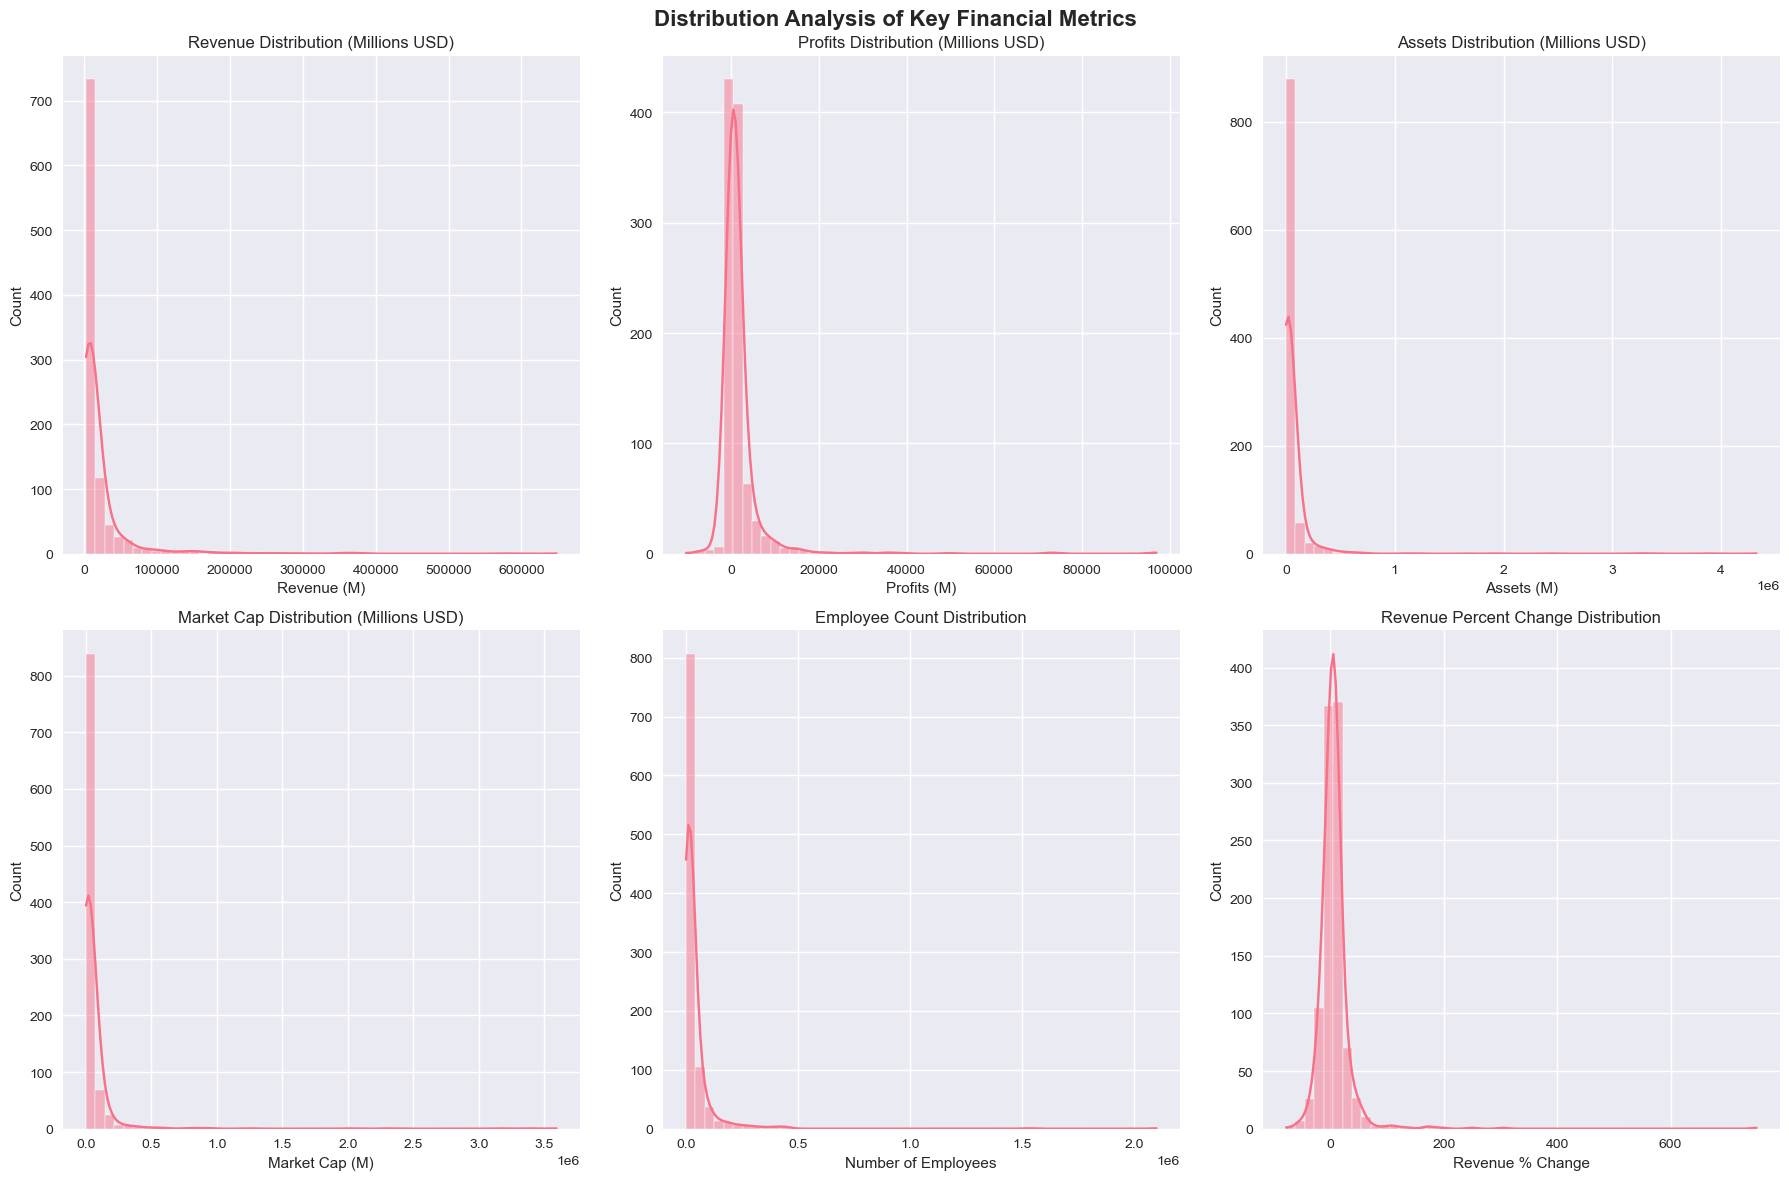

In [20]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create distribution plots for key numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution Analysis of Key Financial Metrics', fontsize=16, fontweight='bold')

# Revenue distribution
sns.histplot(data=data, x='Revenues_M', bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Revenue Distribution (Millions USD)')
axes[0, 0].set_xlabel('Revenue (M)')

# Profits distribution
sns.histplot(data=data, x='Profits_M', bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Profits Distribution (Millions USD)')
axes[0, 1].set_xlabel('Profits (M)')

# Assets distribution
sns.histplot(data=data, x='Assets_M', bins=50, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Assets Distribution (Millions USD)')
axes[0, 2].set_xlabel('Assets (M)')

# Market Cap distribution
sns.histplot(data=data[data['MarketCap_Updated_M'] > 0], x='MarketCap_Updated_M', bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Market Cap Distribution (Millions USD)')
axes[1, 0].set_xlabel('Market Cap (M)')

# Employee count distribution
sns.histplot(data=data, x='Number_of_employees', bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Employee Count Distribution')
axes[1, 1].set_xlabel('Number of Employees')

# Revenue percent change distribution
sns.histplot(data=data[data['RevenuePercentChange'].notna()], x='RevenuePercentChange', bins=50, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Revenue Percent Change Distribution')
axes[1, 2].set_xlabel('Revenue % Change')

plt.tight_layout()
plt.show()


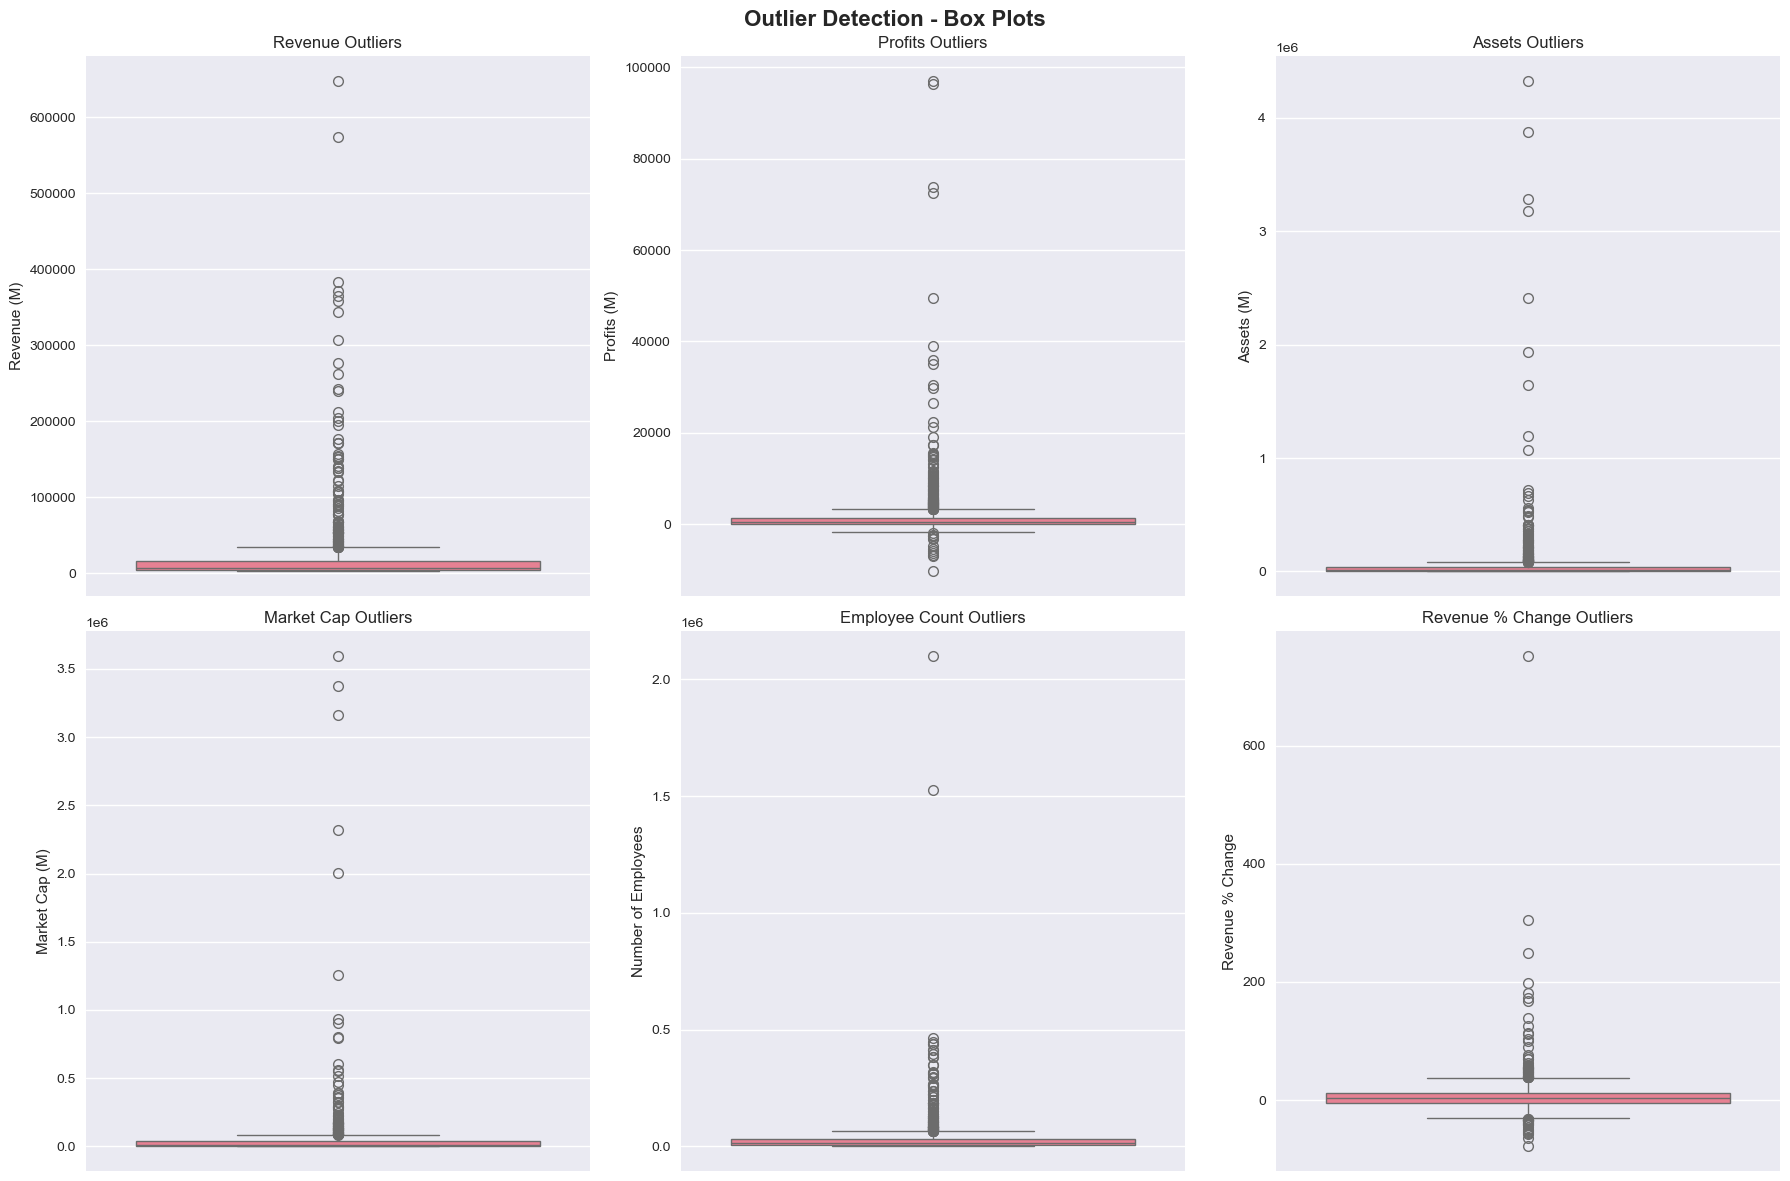

In [21]:
# Box plots to visualize outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')

# Revenue box plot
sns.boxplot(data=data, y='Revenues_M', ax=axes[0, 0])
axes[0, 0].set_title('Revenue Outliers')
axes[0, 0].set_ylabel('Revenue (M)')

# Profits box plot
sns.boxplot(data=data, y='Profits_M', ax=axes[0, 1])
axes[0, 1].set_title('Profits Outliers')
axes[0, 1].set_ylabel('Profits (M)')

# Assets box plot
sns.boxplot(data=data, y='Assets_M', ax=axes[0, 2])
axes[0, 2].set_title('Assets Outliers')
axes[0, 2].set_ylabel('Assets (M)')

# Market Cap box plot
sns.boxplot(data=data[data['MarketCap_Updated_M'] > 0], y='MarketCap_Updated_M', ax=axes[1, 0])
axes[1, 0].set_title('Market Cap Outliers')
axes[1, 0].set_ylabel('Market Cap (M)')

# Employee count box plot
sns.boxplot(data=data, y='Number_of_employees', ax=axes[1, 1])
axes[1, 1].set_title('Employee Count Outliers')
axes[1, 1].set_ylabel('Number of Employees')

# Revenue percent change box plot
sns.boxplot(data=data[data['RevenuePercentChange'].notna()], y='RevenuePercentChange', ax=axes[1, 2])
axes[1, 2].set_title('Revenue % Change Outliers')
axes[1, 2].set_ylabel('Revenue % Change')

plt.tight_layout()
plt.show()


In [ ]:
# Violin plots for better distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution Comparison by Sector', fontsize=16, fontweight='bold')

# Top sectors by count
top_sectors = data['Sector'].value_counts().head(8).index.tolist()
data_top_sectors = data[data['Sector'].isin(top_sectors)]

# Revenue by sector
sns.violinplot(data=data_top_sectors, x='Sector', y='Revenues_M', ax=axes[0, 0])
axes[0, 0].set_title('Revenue Distribution by Sector')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].set_ylabel('Revenue (M)')

# Profits by sector
sns.violinplot(data=data_top_sectors, x='Sector', y='Profits_M', ax=axes[0, 1])
axes[0, 1].set_title('Profits Distribution by Sector')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].set_ylabel('Profits (M)')

# Market Cap by sector
sns.violinplot(data=data_top_sectors[data_top_sectors['MarketCap_Updated_M'] > 0], 
               x='Sector', y='MarketCap_Updated_M', ax=axes[1, 0])
axes[1, 0].set_title('Market Cap Distribution by Sector')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].set_ylabel('Market Cap (M)')

# Employees by sector
sns.violinplot(data=data_top_sectors, x='Sector', y='Number_of_employees', ax=axes[1, 1])
axes[1, 1].set_title('Employee Count Distribution by Sector')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()


### Correlation Analysis with Heatmap


In [ ]:
# Calculate correlation matrix for numerical columns
correlation_cols = ['Rank', 'Revenues_M', 'Profits_M', 'Assets_M', 'MarketCap_Updated_M',
                    'Number_of_employees', 'RevenuePercentChange', 'ProfitsPercentChange', 
                    'Change_in_Rank']

# Filter to only include columns that exist in the dataframe
correlation_cols = [col for col in correlation_cols if col in data.columns]

corr_matrix = data[correlation_cols].corr()

# Create heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            vmin=-1, 
            vmax=1)
plt.title('Correlation Heatmap of Financial Metrics', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [ ]:
# Detailed correlation analysis - show top correlations
corr_matrix_unstacked = corr_matrix.unstack()
corr_matrix_unstacked = corr_matrix_unstacked[corr_matrix_unstacked != 1.0]  # Remove self-correlations
corr_matrix_unstacked = corr_matrix_unstacked.sort_values(ascending=False)

print("Top 10 Positive Correlations:")
print(corr_matrix_unstacked.head(10))
print("\n" + "="*80)
print("Top 10 Negative Correlations:")
print(corr_matrix_unstacked.tail(10))


### Additional Seaborn Visualizations


In [ ]:
# Pair plot for key financial metrics (sample for performance)
sample_data = data.sample(n=200, random_state=42)  # Sample 200 companies for better performance

pair_plot_cols = ['Revenues_M', 'Profits_M', 'Assets_M', 'Number_of_employees']
pair_plot_cols = [col for col in pair_plot_cols if col in sample_data.columns]

sns.pairplot(sample_data[pair_plot_cols], 
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 20},
             height=3)
plt.suptitle('Pair Plot of Key Financial Metrics (Sample: 200 companies)', 
             y=1.02, fontsize=14, fontweight='bold')
plt.show()


In [ ]:
# Scatter plots with regression lines
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Relationship Analysis with Regression Lines', fontsize=16, fontweight='bold')

# Revenue vs Profits
sns.regplot(data=data, x='Revenues_M', y='Profits_M', ax=axes[0, 0], 
            scatter_kws={'alpha': 0.5, 's': 20}, line_kws={'color': 'red'})
axes[0, 0].set_title('Revenue vs Profits')
axes[0, 0].set_xlabel('Revenue (M)')
axes[0, 0].set_ylabel('Profits (M)')

# Revenue vs Market Cap
sns.regplot(data=data[data['MarketCap_Updated_M'] > 0], 
            x='Revenues_M', y='MarketCap_Updated_M', ax=axes[0, 1],
            scatter_kws={'alpha': 0.5, 's': 20}, line_kws={'color': 'red'})
axes[0, 1].set_title('Revenue vs Market Cap')
axes[0, 1].set_xlabel('Revenue (M)')
axes[0, 1].set_ylabel('Market Cap (M)')

# Revenue vs Employees
sns.regplot(data=data, x='Revenues_M', y='Number_of_employees', ax=axes[1, 0],
            scatter_kws={'alpha': 0.5, 's': 20}, line_kws={'color': 'red'})
axes[1, 0].set_title('Revenue vs Number of Employees')
axes[1, 0].set_xlabel('Revenue (M)')
axes[1, 0].set_ylabel('Number of Employees')

# Assets vs Market Cap
sns.regplot(data=data[data['MarketCap_Updated_M'] > 0], 
            x='Assets_M', y='MarketCap_Updated_M', ax=axes[1, 1],
            scatter_kws={'alpha': 0.5, 's': 20}, line_kws={'color': 'red'})
axes[1, 1].set_title('Assets vs Market Cap')
axes[1, 1].set_xlabel('Assets (M)')
axes[1, 1].set_ylabel('Market Cap (M)')

plt.tight_layout()
plt.show()


In [ ]:
# Categorical analysis - Sector performance
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Sector Analysis', fontsize=16, fontweight='bold')

# Top 10 sectors by average revenue
top_sectors_revenue = data.groupby('Sector')['Revenues_M'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_sectors_revenue.values, y=top_sectors_revenue.index, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 10 Sectors by Average Revenue')
axes[0, 0].set_xlabel('Average Revenue (M)')

# Top 10 sectors by average profits
top_sectors_profits = data.groupby('Sector')['Profits_M'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_sectors_profits.values, y=top_sectors_profits.index, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Top 10 Sectors by Average Profits')
axes[0, 1].set_xlabel('Average Profits (M)')

# Sector count
sector_counts = data['Sector'].value_counts().head(10)
sns.barplot(x=sector_counts.values, y=sector_counts.index, ax=axes[1, 0], palette='mako')
axes[1, 0].set_title('Top 10 Sectors by Company Count')
axes[1, 0].set_xlabel('Number of Companies')

# Average market cap by sector
top_sectors_mcap = data[data['MarketCap_Updated_M'] > 0].groupby('Sector')['MarketCap_Updated_M'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_sectors_mcap.values, y=top_sectors_mcap.index, ax=axes[1, 1], palette='rocket')
axes[1, 1].set_title('Top 10 Sectors by Average Market Cap')
axes[1, 1].set_xlabel('Average Market Cap (M)')

plt.tight_layout()
plt.show()


In [ ]:
# Analysis of categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Categorical Variable Analysis', fontsize=16, fontweight='bold')

# Profitable vs Non-Profitable companies
profitable_counts = data['Profitable'].value_counts()
sns.countplot(data=data, x='Profitable', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Profitable vs Non-Profitable Companies')
axes[0, 0].set_ylabel('Count')

# Founder is CEO
founder_ceo_counts = data['Founder_is_CEO'].value_counts()
sns.countplot(data=data, x='Founder_is_CEO', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Founder is CEO')
axes[0, 1].set_ylabel('Count')

# Female CEO
female_ceo_counts = data['FemaleCEO'].value_counts()
sns.countplot(data=data, x='FemaleCEO', ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title('Female CEO')
axes[0, 2].set_ylabel('Count')

# Growth in Jobs
growth_jobs_counts = data['Growth_in_Jobs'].value_counts()
sns.countplot(data=data, x='Growth_in_Jobs', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Growth in Jobs')
axes[1, 0].set_ylabel('Count')

# Company Type
company_type_counts = data['CompanyType'].value_counts()
sns.countplot(data=data, x='CompanyType', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Company Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Global 500
global500_counts = data['Global500'].value_counts()
sns.countplot(data=data, x='Global500', ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Global 500 Companies')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Compare financial metrics by categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Financial Metrics by Categorical Variables', fontsize=16, fontweight='bold')

# Revenue by Profitable status
sns.boxplot(data=data, x='Profitable', y='Revenues_M', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Revenue Distribution: Profitable vs Non-Profitable')
axes[0, 0].set_ylabel('Revenue (M)')

# Profits by Founder is CEO
sns.boxplot(data=data, x='Founder_is_CEO', y='Profits_M', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Profits Distribution: Founder is CEO vs Not')
axes[0, 1].set_ylabel('Profits (M)')

# Market Cap by Company Type
sns.boxplot(data=data[data['MarketCap_Updated_M'] > 0], 
            x='CompanyType', y='MarketCap_Updated_M', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Market Cap Distribution by Company Type')
axes[1, 0].set_ylabel('Market Cap (M)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Revenue by Growth in Jobs
sns.boxplot(data=data, x='Growth_in_Jobs', y='Revenues_M', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Revenue Distribution: Growth in Jobs vs No Growth')
axes[1, 1].set_ylabel('Revenue (M)')

plt.tight_layout()
plt.show()


### Summary Statistics and Key Insights


In [ ]:
# Summary statistics
print("="*80)
print("DATA ANALYSIS SUMMARY")
print("="*80)

print(f"\nTotal Companies: {len(data)}")
print(f"Total Sectors: {data['Sector'].nunique()}")
print(f"Total Industries: {data['Industry'].nunique()}")

print("\n" + "-"*80)
print("FINANCIAL METRICS SUMMARY")
print("-"*80)

financial_metrics = ['Revenues_M', 'Profits_M', 'Assets_M', 'MarketCap_Updated_M', 'Number_of_employees']
for metric in financial_metrics:
    if metric in data.columns:
        valid_data = data[data[metric] > 0][metric] if metric != 'Number_of_employees' else data[metric]
        print(f"\n{metric}:")
        print(f"  Mean: ${valid_data.mean():,.2f}M" if 'M' in metric else f"  Mean: {valid_data.mean():,.0f}")
        print(f"  Median: ${valid_data.median():,.2f}M" if 'M' in metric else f"  Median: {valid_data.median():,.0f}")
        print(f"  Std Dev: ${valid_data.std():,.2f}M" if 'M' in metric else f"  Std Dev: {valid_data.std():,.0f}")
        print(f"  Min: ${valid_data.min():,.2f}M" if 'M' in metric else f"  Min: {valid_data.min():,.0f}")
        print(f"  Max: ${valid_data.max():,.2f}M" if 'M' in metric else f"  Max: {valid_data.max():,.0f}")

print("\n" + "-"*80)
print("CATEGORICAL VARIABLES SUMMARY")
print("-"*80)
print(f"\nProfitable Companies: {len(data[data['Profitable'] == 'yes'])} ({len(data[data['Profitable'] == 'yes'])/len(data)*100:.1f}%)")
print(f"Founder is CEO: {len(data[data['Founder_is_CEO'] == 'yes'])} ({len(data[data['Founder_is_CEO'] == 'yes'])/len(data)*100:.1f}%)")
print(f"Female CEO: {len(data[data['FemaleCEO'] == 'yes'])} ({len(data[data['FemaleCEO'] == 'yes'])/len(data)*100:.1f}%)")
print(f"Growth in Jobs: {len(data[data['Growth_in_Jobs'] == 'yes'])} ({len(data[data['Growth_in_Jobs'] == 'yes'])/len(data)*100:.1f}%)")
print(f"Global 500: {len(data[data['Global500'] == 'yes'])} ({len(data[data['Global500'] == 'yes'])/len(data)*100:.1f}%)")

print("\n" + "-"*80)
print("TOP PERFORMERS")
print("-"*80)
print("\nTop 5 Companies by Revenue:")
print(data.nlargest(5, 'Revenues_M')[['Company', 'Sector', 'Revenues_M', 'Profits_M']].to_string(index=False))

print("\nTop 5 Companies by Market Cap:")
print(data[data['MarketCap_Updated_M'] > 0].nlargest(5, 'MarketCap_Updated_M')[['Company', 'Sector', 'MarketCap_Updated_M', 'Revenues_M']].to_string(index=False))

print("\nTop 5 Companies by Profits:")
print(data.nlargest(5, 'Profits_M')[['Company', 'Sector', 'Profits_M', 'Revenues_M']].to_string(index=False))
